In [547]:
# Import libraries

## Basic libs
import pandas as pd
import numpy as np

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Bulid the data Model
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

sns.set_style('darkgrid')
sns.set(font_scale = 1.1)
#########
# Configure libraries
# changing figure size
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [548]:
%%html
<style>
    table {float:left}
</style>

In [549]:
df = pd.read_csv('Bank-full.csv', sep=';')

#EDA

In [550]:

#shape of dataset
df.shape

(45211, 17)

In [551]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [552]:
# display first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [553]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


Notes:

1- info tells us that there are no null values in dataset
2- only 7 features are numerical
3- 10 fetaures are categorical

In [554]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [555]:
# no null values
pd.isnull(df).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [556]:
# rename target column
df.rename(columns ={'y':'deposit'} , inplace = True)

In [557]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


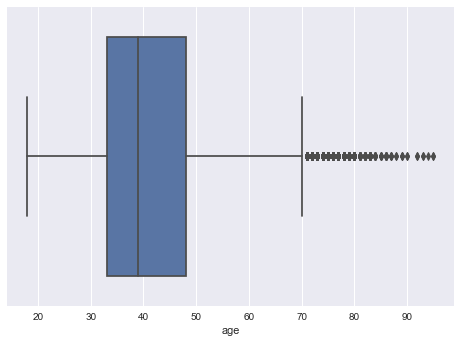

In [558]:
# Boxplot for 'age'
g = sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='age', ylabel='Density'>

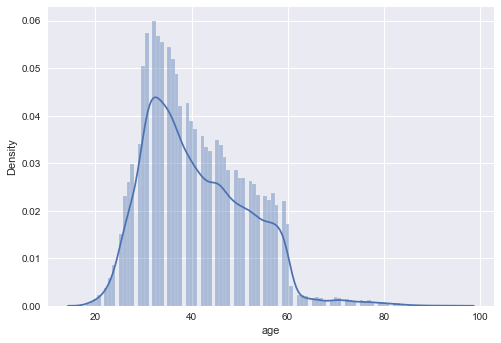

In [559]:
# Distribution of Age
sns.distplot(df.age, bins=100)

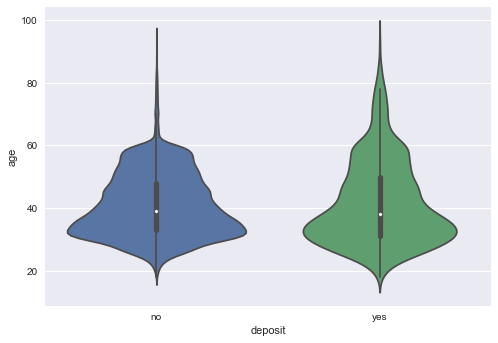

In [560]:
#violin plot for age
sns.violinplot(x="deposit", y="age", data=df, size=8)
plt.show()

Age : This is age of client. A violin plot for age is plotted. It shows its spread as well as histogram. People saying yes has more spread.

# Class Distribution
Another important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 can be considered ideal.

In [561]:
df["deposit"].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

As we can see our class distribution is more or less similar, SO our data is imbalance because no is %88 and yes is %12 SO we need to deal with imbalancing by apply SMOTE 

<AxesSubplot:xlabel='deposit', ylabel='count'>

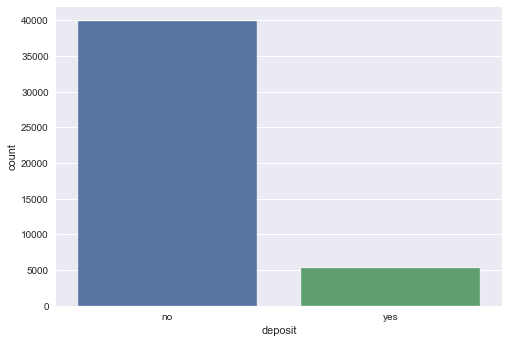

In [562]:
# count plot for deposit
#the dataset is fairly balanced
sns.countplot(data=df,x=df['deposit'])

Deposit : Whether the clients said yes to subscribe for a term deposit. It has two categories. ‘yes’ or ‘no’.

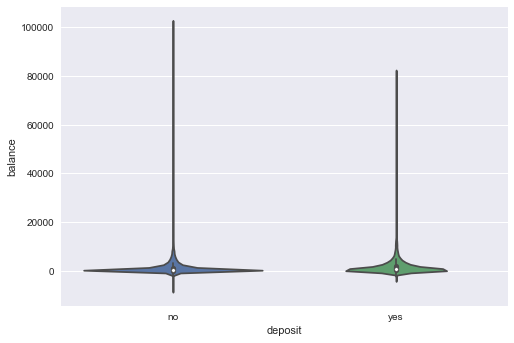

In [563]:
#violin plot for balance
sns.violinplot(x="deposit", y="balance", data=df, size=8)
plt.show()

In [564]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome'>

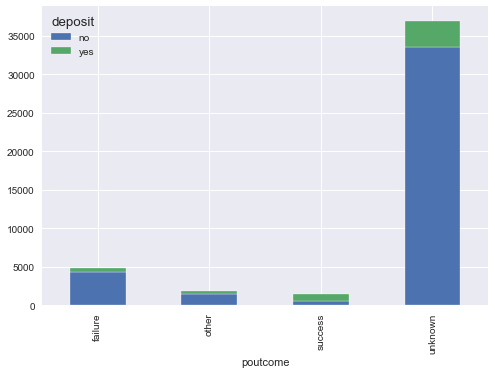

In [565]:
# bar chart for poutcome
types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

poutcome : The outcome of previous marketing campaign. It’s a categorical feature. Many of them were not contacted in previous campaign.

In [566]:
df["previous"].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

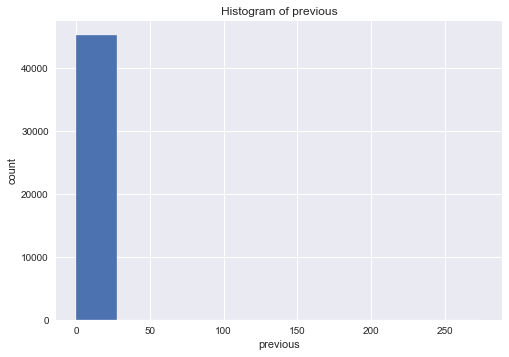

In [567]:
#histogram of previous
df['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

Previous : Number of times this client was contacted before this campaign.

In [568]:
df["pdays"].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

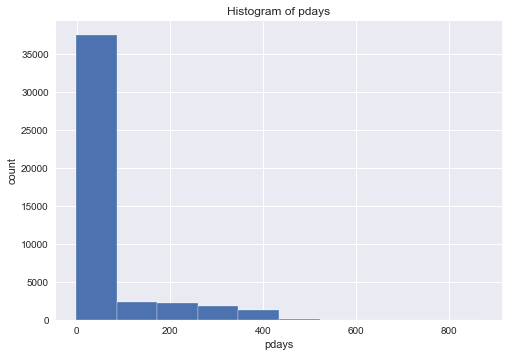

In [569]:
#histogram of pdays
df['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

Pdays : number of days that passed after the client was last contacted in previous campaign. Its value is -1 if the client was not contacted previously.

In [570]:
df["campaign"].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

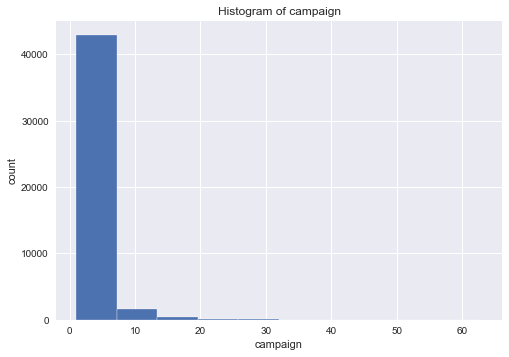

In [571]:
#Histogram of campaign
df['campaign'].hist()
plt.title('Histogram of campaign')
plt.ylabel('count')
plt.xlabel('campaign');
plt.show()

campaign : Number of times this client was contacted during this campaign.

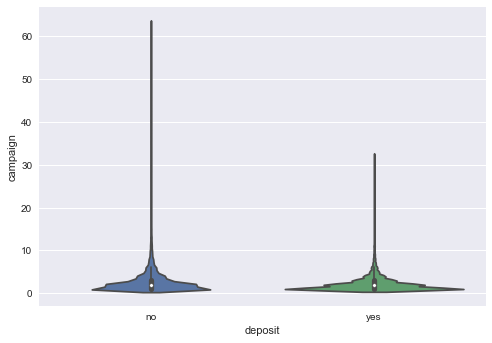

In [572]:
#violin plot for campaign
sns.violinplot(x="deposit", y="campaign", data=df, size=8)
plt.show()

In [573]:
df["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

<AxesSubplot:xlabel='month'>

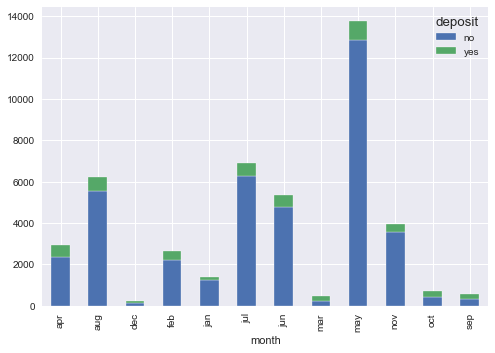

In [574]:
#bar chart for month
types = df.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Month : the month in which the client was contacted. Maximum clients were contacted in May.

In [575]:
df["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

<AxesSubplot:xlabel='day'>

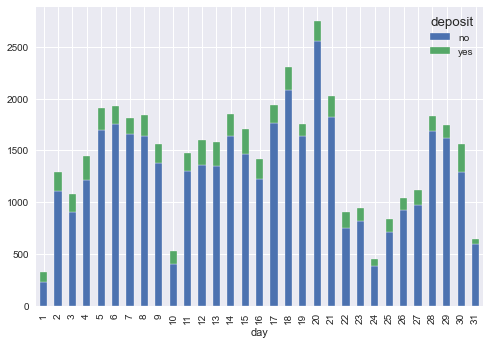

In [576]:
# group by days to display bar chart
types = df.groupby("day")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Day : which day of the month was the client contacted. More clients were contacted in the middle of the month.

In [577]:
df["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact'>

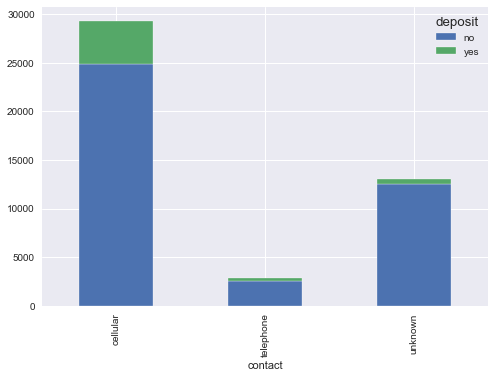

In [578]:
# group by contact to display bar chart
types = df.groupby("contact")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Contact : This feature specifies the way of communication. It can be cellular or telephone. Some of them are unknown.

In [579]:
df["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan'>

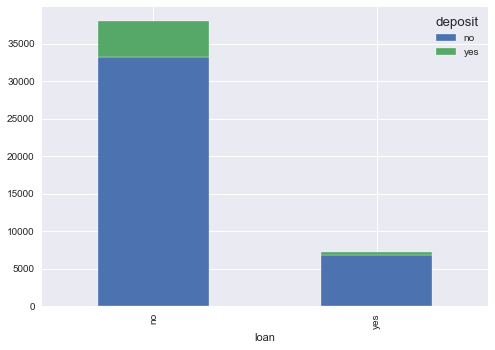

In [580]:
# group by loan to display bar chart
types = df.groupby("loan")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Loan : Most of them don’t already have personal loan in bank.

<AxesSubplot:xlabel='marital'>

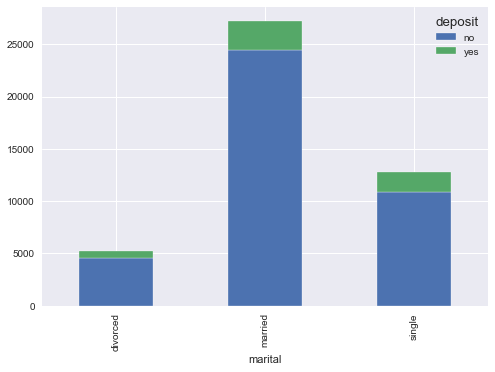

In [581]:
# group by marital to display bar chart
types = df.groupby("marital")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Marital : This is a categorical feature. It has 3 categories. Married clients constitute the largest portion of this feature.

In [582]:
df["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing'>

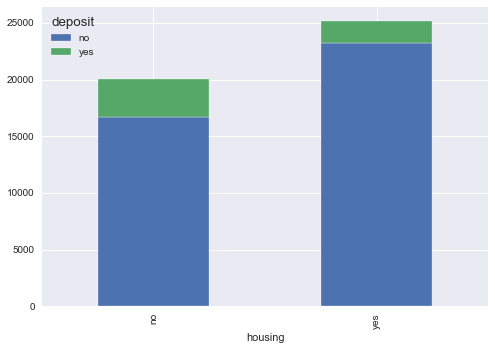

In [583]:
# group by housing to display bar chart
types = df.groupby("housing")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Housing : Whether the client has already got any housing loan from bank? Apparently clients who do not already have housing loan tend to subscribe to deposit more.

In [584]:
df["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

<AxesSubplot:xlabel='default'>

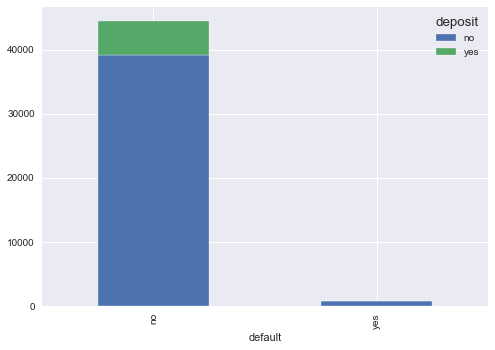

In [585]:
# group by default to display bar chart
types = df.groupby("default")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Default : it tells whether the client has credit in bank or not? Most of them don’t have credit.

In [586]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot:xlabel='job'>

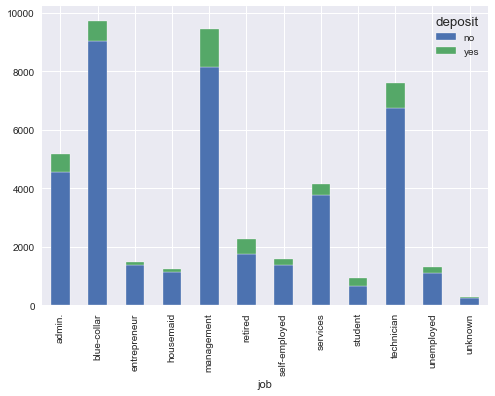

In [587]:
# group by job to display bar chart
types = df.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Job : This is a categorical feature. It has 12 categories including unknown. The largest clients in this category belong to management jobs with percentage of 50 while unknown category has least count.

In [588]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

<AxesSubplot:xlabel='education'>

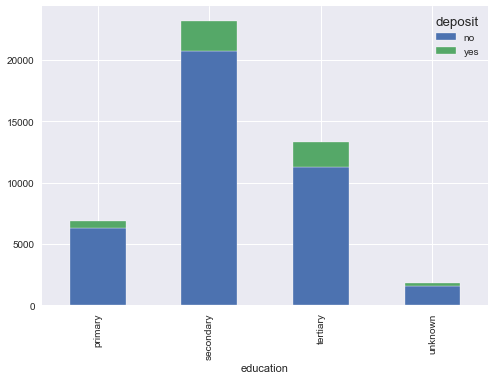

In [589]:
# group by education to display bar chart
types = df.groupby("education")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Education : Maximum clients belong to category of secondary education. The category tertiary education has larger ratio of clients saying yes to term deposit than any other category.

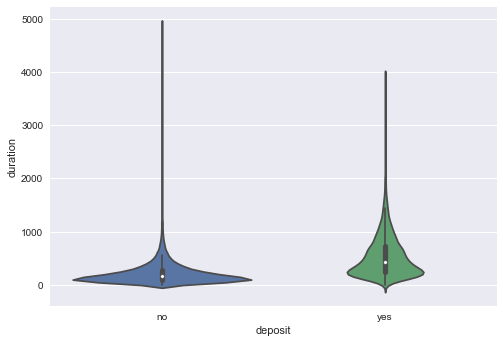

In [590]:
#violin plot for duration
sns.violinplot(x="deposit", y="duration", data=df, size=8)
plt.show()

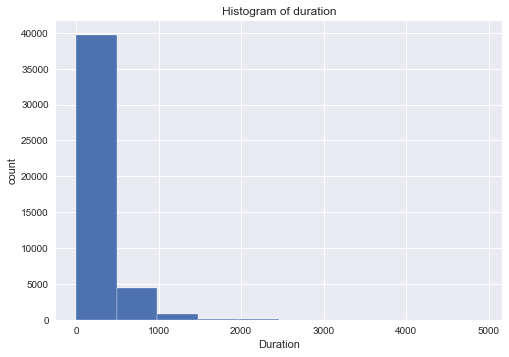

In [591]:
#Histogram of duration
df['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

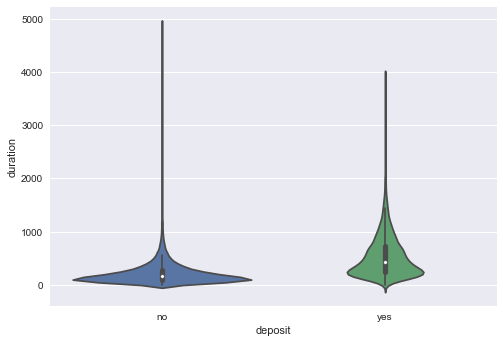

In [592]:
sns.violinplot(x="deposit", y="duration", data=df, size=8)
plt.show()

Duration : The duration of call in seconds when the client was contacted last time. A histogram is plotted for this and there are very less number of clients having very long duration. Violin plot indicates that people with longer duration have more possibility of saying yes to deposit.

# Preprocessing

In [593]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
df['deposit'].replace(to_replace='yes', value=1, inplace=True)
df['deposit'].replace(to_replace='no',  value=0, inplace=True)
df['deposit']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int64

In [594]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
df['loan'].replace(to_replace='no', value=1, inplace=True)
df['loan'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,1,unknown,5,may,198,1,-1,0,unknown,0


In [595]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
df['default'].replace(to_replace='no', value=1, inplace=True)
df['default'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,1,2143,yes,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,yes,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,yes,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,yes,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,no,1,unknown,5,may,198,1,-1,0,unknown,0


In [596]:
df["loan"].value_counts()

1    37967
0     7244
Name: loan, dtype: int64

In [597]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
df['housing'].replace(to_replace='no', value=1, inplace=True)
df['housing'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,1,2143,0,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,0,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,0,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,0,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,1,1,unknown,5,may,198,1,-1,0,unknown,0


# Encode Categorical Value
Same as the numerical data, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use OneHotEncoder() provided by sklearn. Basically it will transform a categorical column from this: ...

In this code cell we will also encode our label column by replacing 'yes' and 'no' with 1 and 0 respectively. We can do this by applying simple lambda/in-line function on the column.

[Convert to dummy values ] # Convert categorical variables to dummies

In [598]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['marital'])
df = df.drop('marital',axis = 1)
df = df.join(one_hot)

In [599]:
df = df.drop('divorced',axis = 1)

In [600]:
df.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single
0,58,management,tertiary,1,2143,0,1,unknown,5,may,261,1,-1,0,unknown,0,1,0
1,44,technician,secondary,1,29,0,1,unknown,5,may,151,1,-1,0,unknown,0,0,1
2,33,entrepreneur,secondary,1,2,0,0,unknown,5,may,76,1,-1,0,unknown,0,1,0
3,47,blue-collar,unknown,1,1506,0,1,unknown,5,may,92,1,-1,0,unknown,0,1,0
4,33,unknown,unknown,1,1,1,1,unknown,5,may,198,1,-1,0,unknown,0,0,1


In [601]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['education'])
df = df.drop('education',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single,primary,secondary,tertiary
0,58,management,1,2143,0,1,unknown,5,may,261,1,-1,0,unknown,0,1,0,0,0,1
1,44,technician,1,29,0,1,unknown,5,may,151,1,-1,0,unknown,0,0,1,0,1,0
2,33,entrepreneur,1,2,0,0,unknown,5,may,76,1,-1,0,unknown,0,1,0,0,1,0
3,47,blue-collar,1,1506,0,1,unknown,5,may,92,1,-1,0,unknown,0,1,0,0,0,0
4,33,unknown,1,1,1,1,unknown,5,may,198,1,-1,0,unknown,0,0,1,0,0,0


In [602]:
one_hot = pd.get_dummies(df['job'])
df = df.drop('job',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,1,2143,0,1,unknown,5,may,261,1,...,0,0,0,1,0,0,0,0,0,0
1,44,1,29,0,1,unknown,5,may,151,1,...,0,0,0,0,0,0,0,0,1,0
2,33,1,2,0,0,unknown,5,may,76,1,...,0,1,0,0,0,0,0,0,0,0
3,47,1,1506,0,1,unknown,5,may,92,1,...,1,0,0,0,0,0,0,0,0,0
4,33,1,1,1,1,unknown,5,may,198,1,...,0,0,0,0,0,0,0,0,0,0


In [603]:
# one hot encoding for contact feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['contact'])
df = df.drop('contact',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,58,1,2143,0,1,5,may,261,1,-1,...,0,1,0,0,0,0,0,0,0,0
1,44,1,29,0,1,5,may,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,1,2,0,0,5,may,76,1,-1,...,0,0,0,0,0,0,0,0,0,0
3,47,1,1506,0,1,5,may,92,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,1,1,1,1,5,may,198,1,-1,...,0,0,0,0,0,0,0,0,0,0


In [604]:
# one hot encoding for month feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['month'])
df = df.drop('month',axis = 1)
df = df.join(one_hot)
df = df.drop('dec',axis = 1)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,1,2143,0,1,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,1,29,0,1,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,1,2,0,0,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1,1506,0,1,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,1,1,1,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [605]:
# one hot encoding for poutcome feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['poutcome'])
df = df.drop('poutcome',axis = 1)
df = df.join(one_hot)
df = df.drop('other',axis = 1)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,58,1,2143,0,1,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,29,0,1,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,1,2,0,0,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1,1506,0,1,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,1,1,1,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [606]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45211 non-null  int64
 1   default        45211 non-null  int64
 2   balance        45211 non-null  int64
 3   housing        45211 non-null  int64
 4   loan           45211 non-null  int64
 5   day            45211 non-null  int64
 6   duration       45211 non-null  int64
 7   campaign       45211 non-null  int64
 8   pdays          45211 non-null  int64
 9   previous       45211 non-null  int64
 10  deposit        45211 non-null  int64
 11  married        45211 non-null  uint8
 12  single         45211 non-null  uint8
 13  primary        45211 non-null  uint8
 14  secondary      45211 non-null  uint8
 15  tertiary       45211 non-null  uint8
 16  admin.         45211 non-null  uint8
 17  blue-collar    45211 non-null  uint8
 18  entrepreneur   45211 non-null  uint8
 19  hous

NOTE All Features are converted to numerical

# Correlation with Class variable 'deposit'

In [607]:
# Copying original dataframe
bank= df.copy()

CorrBank=bank.drop("deposit", axis=1).apply(lambda x: x.corr(bank.deposit))

In [608]:
# puttinh in descending order
Corr2=CorrBank.sort_values(ascending=False)

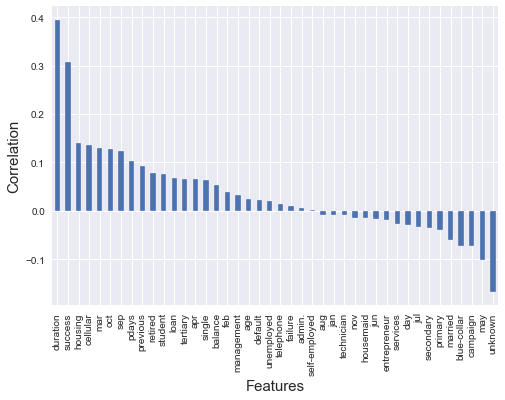

In [609]:
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()

Notes :

1- As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
2- If the call duration is more , there are higher chances of getting a yes from the client.
3- It has been sorted in descending order.
4- Succes , cellular, housing, unknown, campaign are also highly correlated

## Split Dataset for Training and Testing


To finish up our data pre-processing steps we will split our data into two dataset, training and testing. In this case because we have enough data we will split the data with ratio of 80:20 for training and testing respectively. This will result in our training data having 36168 rows and 9043 rows for the testing data

In [610]:
# Select Features
feature = bank.drop('deposit', axis=1)

# Select Target
target = bank['deposit']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2,random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (36168, 42)
Shape of testing feature: (9043, 42)
Shape of training label: (36168,)
Shape of training label: (9043,)


## Scale Numeric Data

Next up, we will scale our numerical data to avoid outlier presence that can significantly affect our model. Using `StandardScaler()` function from sklearn we can scale each our columns that contains numerical data. The scaling will be done using the formula below:

<div align="center">$Z = \frac{X - U}{S}$</div>

*Where:*

*$Z:$ scaled value*

*$X:$ original value*

*$U:$ mean of the data*

*$S:$ standard deviation of the data*

In [611]:
#we tried to scale before splitting by applying this code : 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
#bank[num_cols] = scaler.fit_transform(bank[num_cols])
#bank.head()
# and it result in haigh accuarcy in all algorithms but it was because data leakage So we decide to split then scale

#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)



# Handling The Class Imbalance : SMOTE
synthetic minority oversampling technique. Instead of just duplicating minority samples for training, SMOTE generates "synthetic" minority observations as points in feature space that lie in between different minority samples, with the idea that these should be good representatives of the minority class. Since this is a **distance-based approach**, one should generally be careful about scaling the data, and might find that the technique starts to break down with too many features due to the curse of dimensionality.  

![](http://www.svds.com/wp-content/uploads/2016/08/ImbalancedClasses_fig11.png)

In [612]:
# smote
import imblearn.over_sampling
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 4, 0 : n_neg} 

smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_train, y_train = smote.fit_resample(X_train, y_train)


# Build the Data Model
Below we will define a helper function to evaluate each trained model and with the metrics mentioned above and save the score to a variable.

In [613]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Decision Tree

Decision tree is a tree shaped diagram used to determine a course of action. Each branch of the tree represents a possible decision, occurrence or reaction.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/decision_tree.PNG' height='250'></div>

Advantages:
* Inexpensive to construct
* Extremely fast at classifying unknown records
* Easy to interpret for small-sized trees•
* Accuracy is comparable to other classification techniques for many simple data sets

Disadvantages:
* Overfitting when algorithm capture noise in the data
* The model can get unstable due to small variation of data
* Low biased tree: difficult for the model to work with new data

In [614]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(criterion = 'entropy',random_state=0)
dtc.fit(X_train, y_train)
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8659736813004534
Precision: 0.4363207547169811
Recall: 0.5285714285714286
F1 Score: 0.47803617571059437
Area Under Curve: 0.7194339690085968
Confusion Matrix:
 [[7276  717]
 [ 495  555]]


## Random Forest

Random forest or Random Decision Forest is a method that operates by constructing multiple decision trees during training phases. The decision of the majority of the trees is chosen as final decision.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/random_forest.PNG' height='250'></div>

Advantages:
* It can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features.
* It is also considered as a very handy and easy to use algorithm, because it’s default hyper-parameters often produce a good prediction result.

Disadvantages:
* Many trees can make the algorithm to slow and ineffective for real-time predictions. A more accurate prediction requires more trees, which results in a slower model.
* It is a predictive modelling tool and not a descriptive tool.

In [615]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=0)
rf.fit(X_train, y_train)
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8981532677208891
Precision: 0.5776173285198556
Recall: 0.45714285714285713
F1 Score: 0.5103668261562999
Area Under Curve: 0.9037471478019459
Confusion Matrix:
 [[7642  351]
 [ 570  480]]


## Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. Below are the Bayes theorem formula:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)}$</div>

For example, given:
* A doctor knows that meningitis  causes  stiff neck 50% of the time
* Prior probability  of any patient  having  meningitis  is 1/50,000
* Prior probability  of any patient  having  stiff neck is 1/20

Then the probability of patient who have stiff neck to also have meningitis is:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)} = \frac{0.5 * (1 / 50000)}{1 / 20} = 0.0002$</div>

In [616]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.84739577573814
Precision: 0.3894101876675603
Recall: 0.5533333333333333
F1 Score: 0.45712037765538943
Area Under Curve: 0.8066458150882023
Confusion Matrix:
 [[7082  911]
 [ 469  581]]


## K-Nearest Neighbors

K-Nearest Neighbors (KNN) classify new data by finding k-number of closest neighbor from the training data and then decide the class based on the majority of it's neighbors. For example in the image below where $k = 3$ majority of it's neighbor is classified as B, but when $k = 7$ the majority will changes to A.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/knn.PNG' height='200'></div>

Advantages:
* Simple technique that is easily implemented
* Building model is cheap
* Extremely flexible classification scheme

Disadvantages:
* Classifying unknown records are relatively expensive
* Requires distance computation of k-nearest neighbors
* Computationally intensive, especially when the size of the training set grows
* Accuracy can be severely degraded by the presence of noisy or irrelevant features

In [617]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8525931659847396
Precision: 0.41117388575015695
Recall: 0.6238095238095238
F1 Score: 0.4956488838441165
Area Under Curve: 0.8250911809738283
Confusion Matrix:
 [[7055  938]
 [ 395  655]]


## Model Comparison

After building all of our model, we can now compare how well each model perform. To do this we will create two chart, first is a grouped bar chart to display the value of accuracy, precision, recall and f1 and second a line chart to show the AUC of all our models.

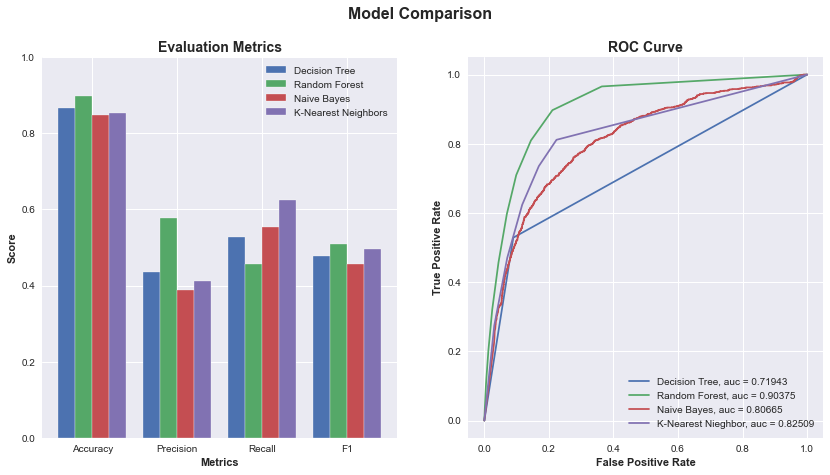

In [619]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

*From* the figures above we can see that our Random Forest model tops the other models in 4 of the 5 metrics we evaluate, except precision. So we can assume that Random Forest is the right choice to solve our problem.